<a href="https://colab.research.google.com/github/victoriawhite17/Sales_Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Predictions
- Victoria White
- July 26, 2022

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTwXaFdnd7A1D_JqduZPEXyrGa4VYMiSgpo_hNNmP8NCvH4kLP6tZmmqhL4KUPmHagManDfFdmjX-fW/pub?gid=942422199&single=true&output=csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight'].max()

21.35

In [10]:
df['Item_Weight'].min()

4.555

In [11]:
df['Item_Weight'].mean() #determining if I should fill in missing data with the average or if I should drop the column altogether.

12.857645184135976

In [12]:
df1 = df.drop(columns=['Outlet_Size', 'Item_Weight']) #dropping outlet size to fix missing data. I believe outlet location type is enough information to be able to drop size without losing important information and item_weight doesn't seem relative for sale predictions

In [13]:
df1.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
df['Item_Fat_Content'].unique() #finding values in item fat content column

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
df1['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}, inplace=True) #replacing values to reduce the amount of values

In [16]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

##Finding Summary Statistics for Numerical Columns

In [17]:
df1.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


##Exploring Data Visualizations
```



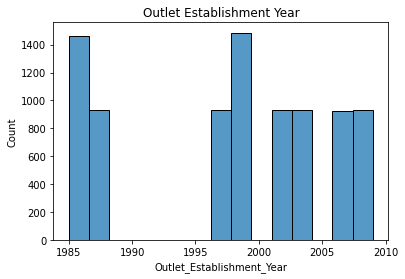

In [35]:
import seaborn as sns
ax = sns.histplot(data=df1, x='Outlet_Establishment_Year')
ax.set(title='Outlet Establishment Year');

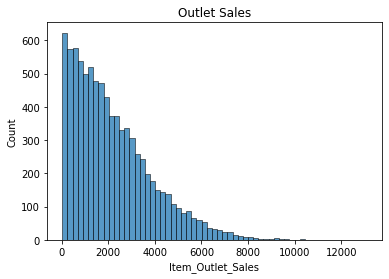

In [29]:
ax = sns.histplot(data=df1, x='Item_Outlet_Sales')
ax.set(title='Outlet Sales');

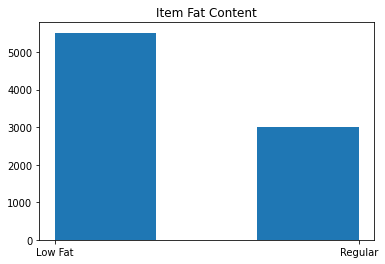

In [81]:
plt.hist(df1['Item_Fat_Content'], bins=3)
plt.title('Item Fat Content');

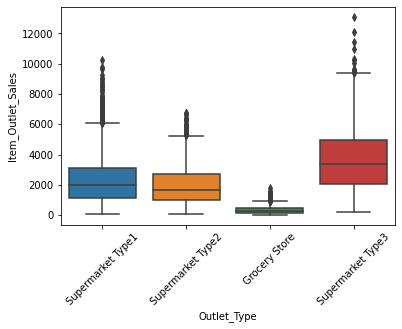

In [89]:
outlet_type = df1['Outlet_Type']
sales = df1['Item_Outlet_Sales']

ax = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

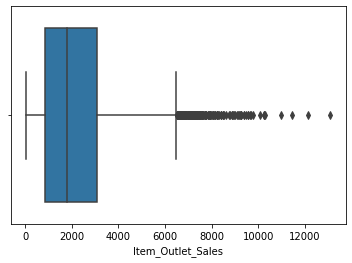

In [92]:
ax = sns.boxplot(x=sales, data=df1)

In [61]:
low_fat = df['Item_Fat_Content'] == 'Low Fat'
regular = df['Item_Fat_Content'] == 'Regular'

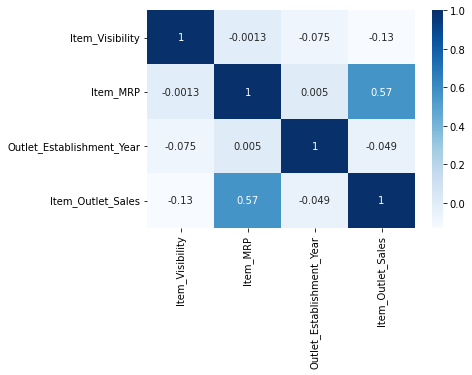

In [34]:
corr = df1.corr()
sns.heatmap(corr, cmap = "Blues", annot = True);